In [5]:
# 1. Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import itertools
%matplotlib inline

In [6]:
df = pd.read_csv('default of credit card clients.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

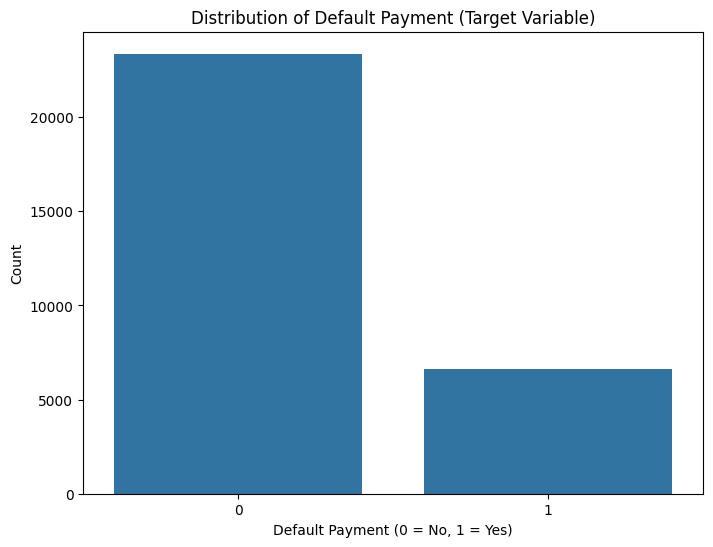

In [10]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payment (Target Variable)')
plt.xlabel('Default Payment (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

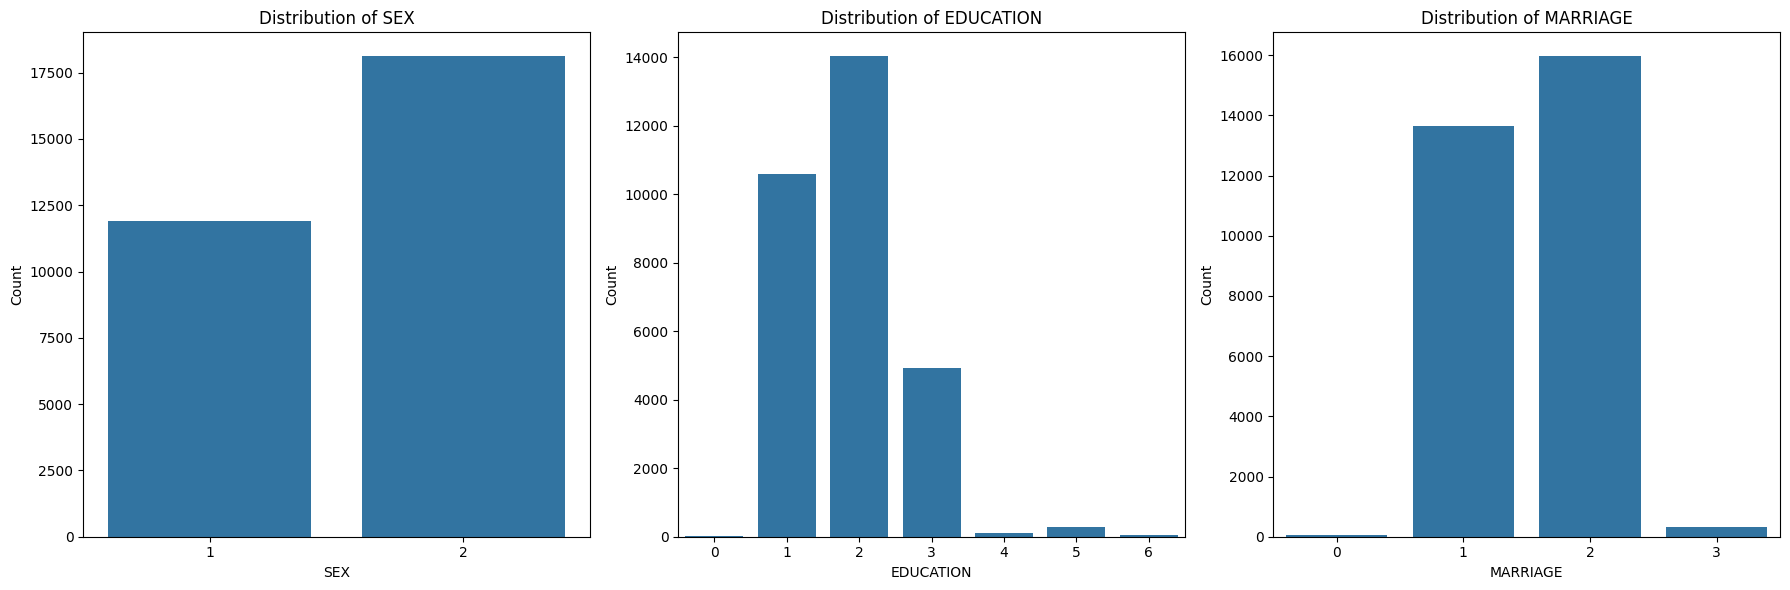

In [11]:
# Bar plot for categorical variables (SEX, EDUCATION, MARRIAGE)
plt.figure(figsize=(18, 6))
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

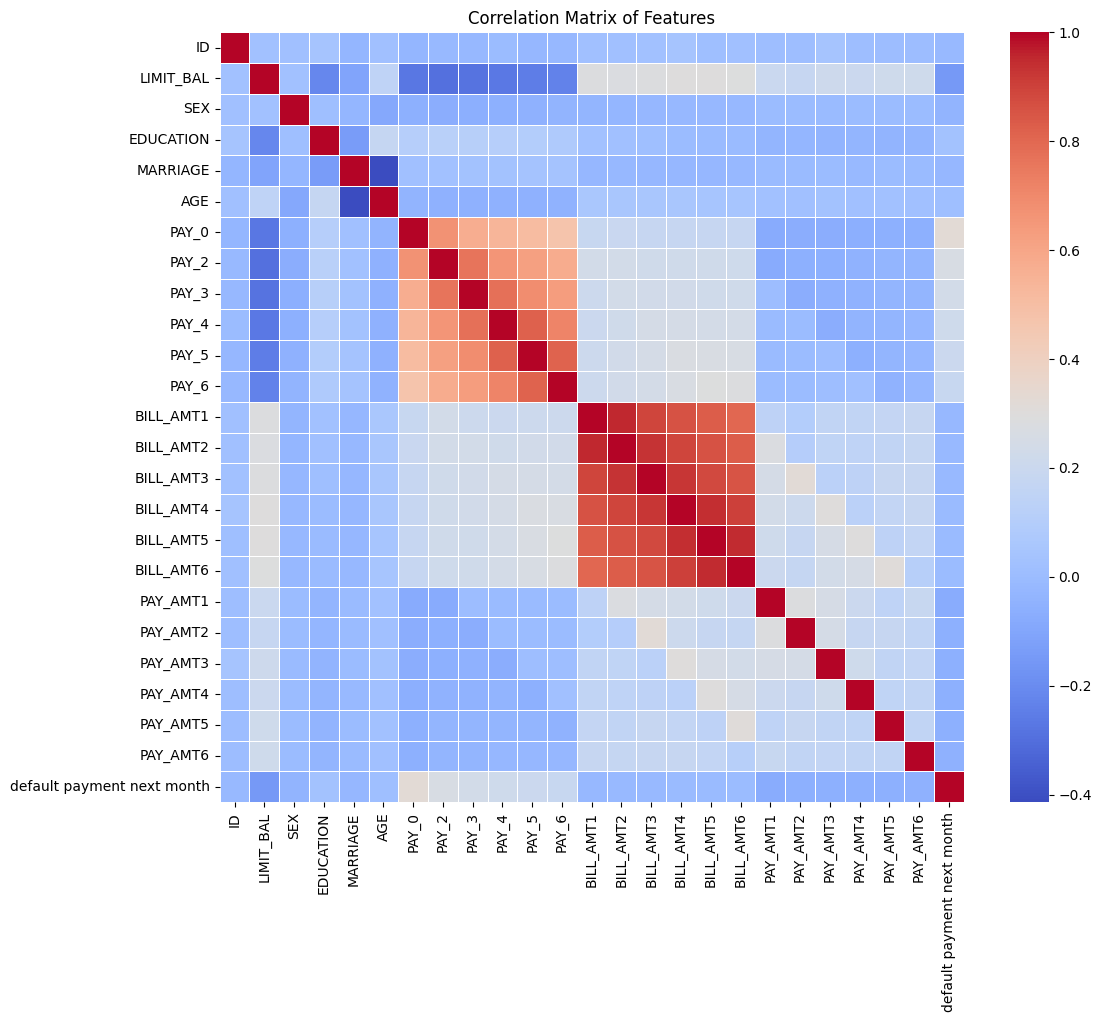

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

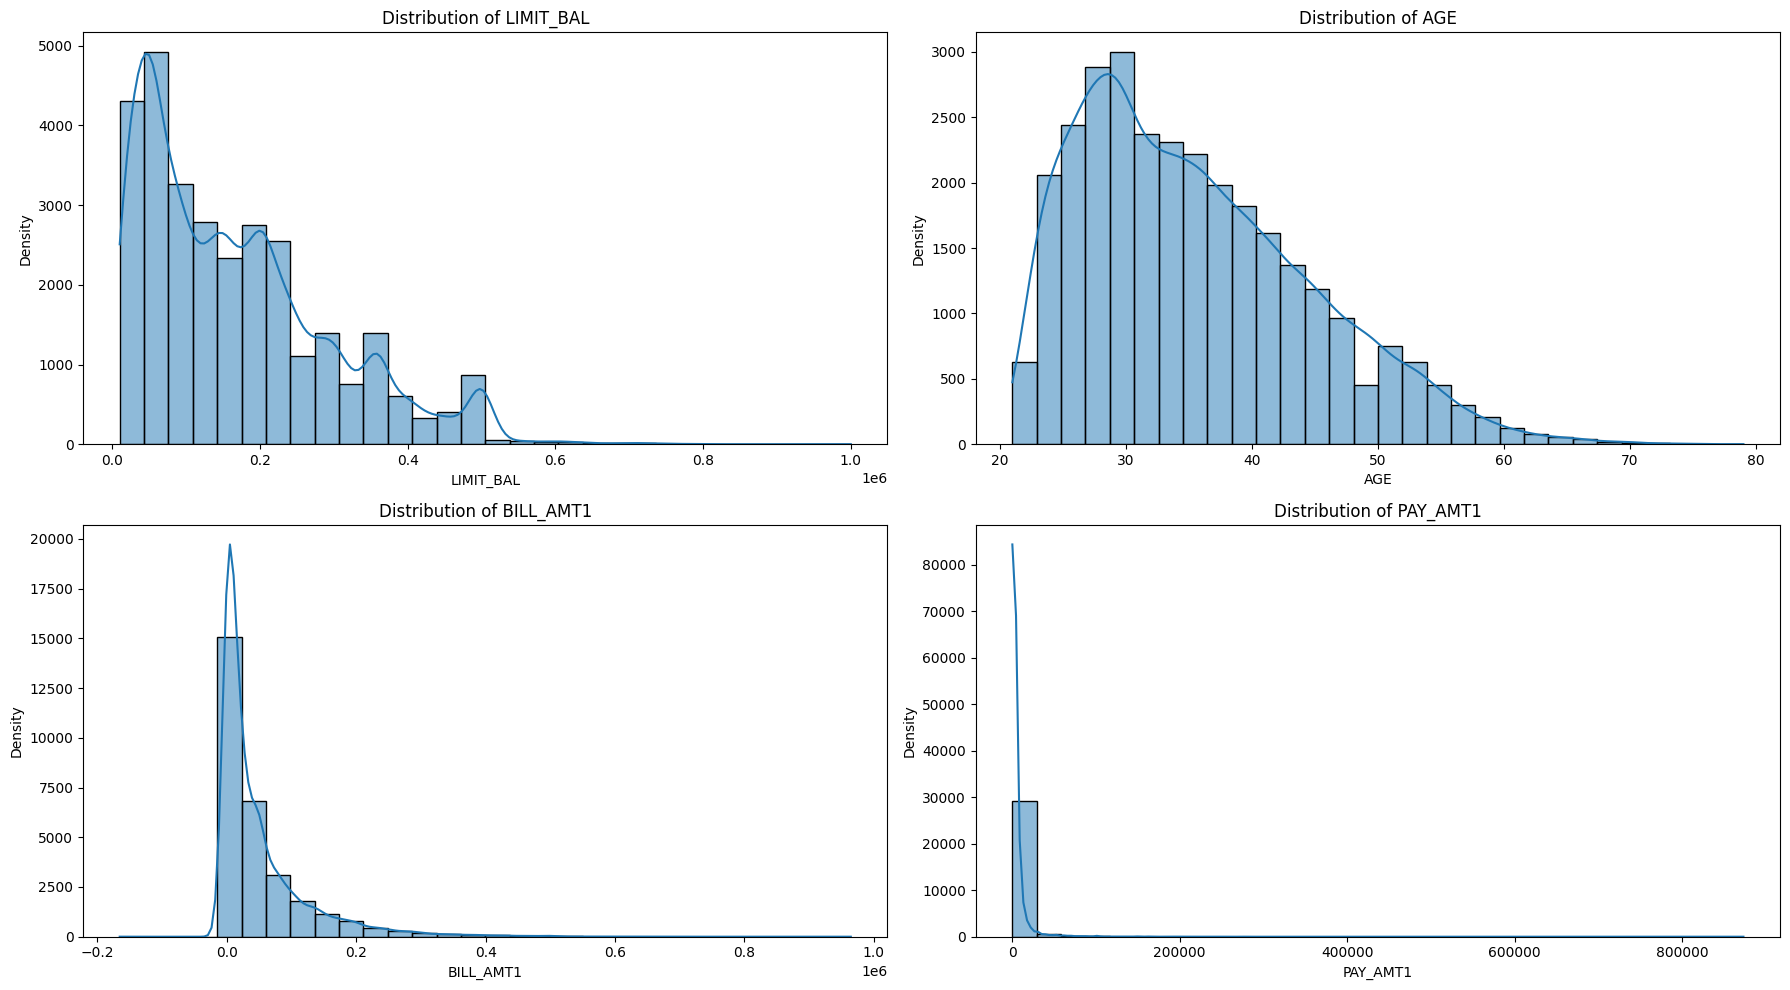

In [13]:
# Distribution of numerical features
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
plt.figure(figsize=(18, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [14]:
# Separate features (X) and target (y)
X = df.drop(columns=['default payment next month', 'ID'])
y = df['default payment next month']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Verify shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

In [15]:
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

In [16]:
# Convert data to tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Long for classification
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

In [17]:
# Define the MLP Classification model
class MLPClassification(nn.Module):
    def __init__(self, input_size, hidden_layers, activation):
        super(MLPClassification, self).__init__()
        layers = []
        for neurons in hidden_layers:
            layers.append(nn.Linear(input_size, neurons))
            if activation == 'relu':
                layers.append(nn.ReLU())
            elif activation == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation == 'tanh':
                layers.append(nn.Tanh())
            elif activation == 'softmax':
                layers.append(nn.Softmax(dim=1))
            elif activation == 'linear':
                pass  # Linear activation is identity
            input_size = neurons
        layers.append(nn.Linear(input_size, 2))  # Output layer for 2 classes
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Hyperparameter options
hidden_layers_options = [
    [4], [16], [32], [64],             # 1 hidden layer
    [4, 16], [16, 32], [32, 64],      # 2 hidden layers
    [4, 16, 32], [16, 32, 64]         # 3 hidden layers
]
activation_options = ["relu", "sigmoid", "tanh", "linear"]
epochs_options = [1, 10, 25, 50, 100, 250]
learning_rate_options = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_size_options = [16, 32, 64, 128, 256, 512]

# Store results
results = []

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loop through hyperparameter combinations
for hidden_layers in hidden_layers_options:
    for activation in activation_options:
        for epochs in epochs_options:
            for lr in learning_rate_options:
                for batch_size in batch_size_options:
                    # Initialize model
                    model = MLPClassification(input_size=X_train_tensor.shape[1], 
                                               hidden_layers=hidden_layers, 
                                               activation=activation).to(device)
                    
                    # Define loss function and optimizer
                    criterion = nn.CrossEntropyLoss()
                    optimizer = optim.Adam(model.parameters(), lr=lr)
                    
                    # Training loop
                    for epoch in range(epochs):
                        model.train()
                        optimizer.zero_grad()
                        outputs = model(X_train_tensor)
                        loss = criterion(outputs, y_train_tensor)
                        loss.backward()
                        optimizer.step()
                    
                    # Evaluate on test set
                    model.eval()
                    with torch.no_grad():
                        y_pred_tensor = model(X_test_tensor)
                        y_pred_prob = torch.softmax(y_pred_tensor, axis=1).cpu().numpy()[:, 1]
                        y_pred = torch.argmax(y_pred_tensor, axis=1).cpu().numpy()
                        accuracy = accuracy_score(y_test, y_pred)
                        mae = mean_absolute_error(y_test, y_pred)
                        mse = mean_squared_error(y_test, y_pred)
                        r2 = r2_score(y_test, y_pred)

                    # Store results
                    results.append({
                        'hidden_layers': hidden_layers,
                        'activation': activation,
                        'epochs': epochs,
                        'learning_rate': lr,
                        'batch_size': batch_size,
                        'accuracy': accuracy,
                        'mae': mae,
                        'mse': mse,
                        'r2': r2
                    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv("mlp_classification_results.csv", index=False)
print("All results have been saved to 'mlp_classification_results.csv'.")

All results have been saved to 'mlp_classification_results.csv'.


In [18]:
from tabulate import tabulate
# Display top 20 results
top_20_results = results_df.sort_values(by='accuracy', ascending=False).head(20)
# Display the top results in a tabular format
print(tabulate(top_20_results, headers='keys', tablefmt='pretty'))

+------+---------------+------------+--------+---------------+------------+--------------------+---------------------+---------------------+-----------------------+
|      | hidden_layers | activation | epochs | learning_rate | batch_size |      accuracy      |         mae         |         mse         |          r2           |
+------+---------------+------------+--------+---------------+------------+--------------------+---------------------+---------------------+-----------------------+
| 6460 |  [4, 16, 32]  |  sigmoid   |  250   |      0.1      |    256     |       0.821        |        0.179        |        0.179        | -0.03917532955194347  |
| 6215 |  [4, 16, 32]  |    relu    |  100   |     0.01      |    512     |       0.821        |        0.179        |        0.179        | -0.03917532955194347  |
| 7510 | [16, 32, 64]  |    tanh    |  100   |     0.01      |    256     | 0.8203333333333334 | 0.17966666666666667 | 0.17966666666666667 | -0.04304562873090778  |
| 6246 |  

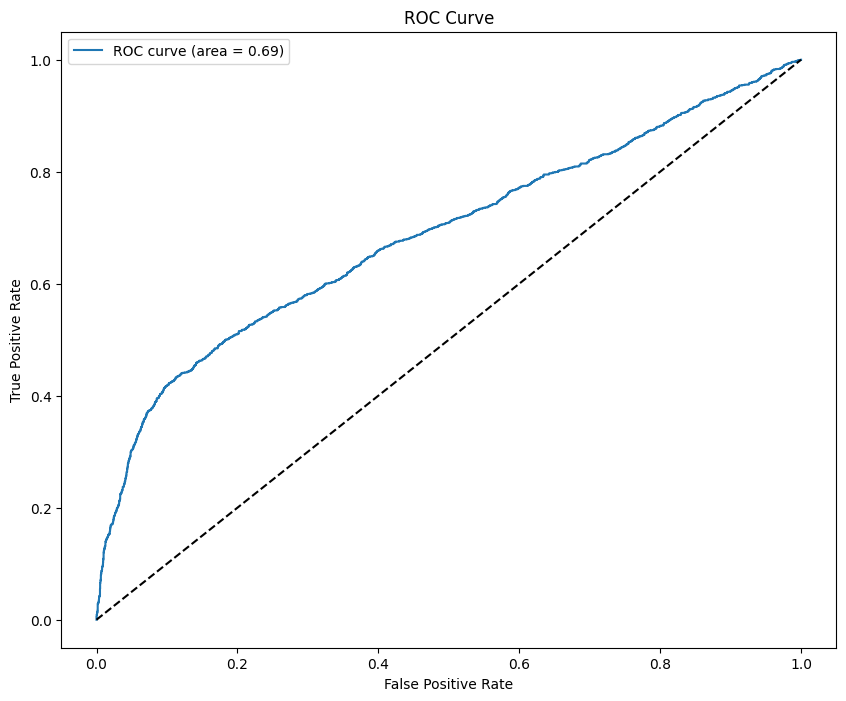

In [19]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 2. ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

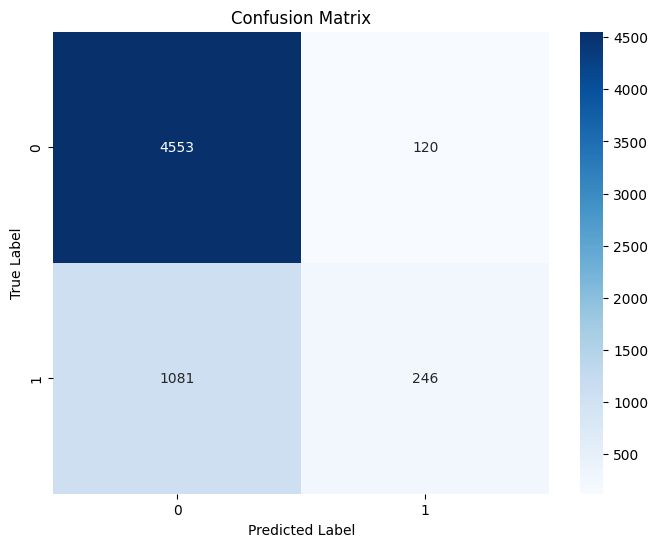

In [20]:
# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

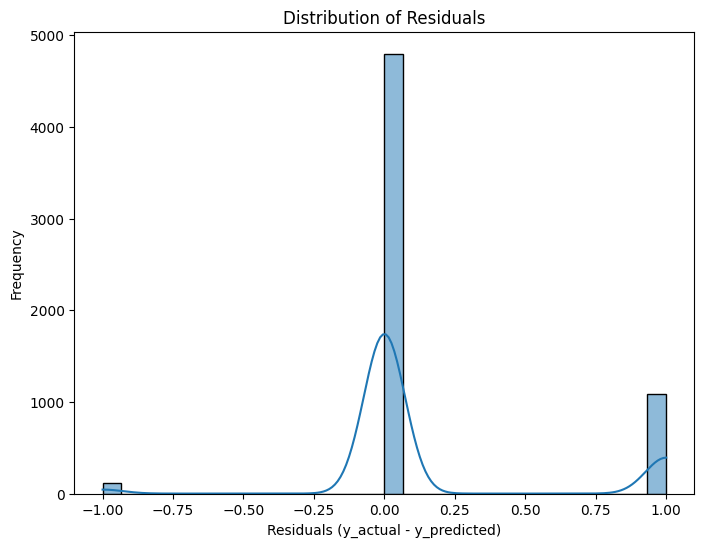

In [22]:
# Distribution of Errors (Residuals)
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred  # Assuming y_pred is the final predictions from the best model
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (y_actual - y_predicted)')
plt.ylabel('Frequency')
plt.show()

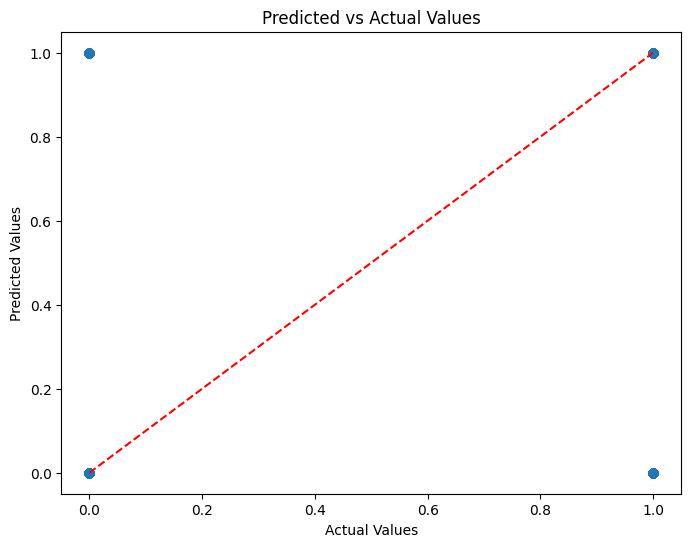

In [23]:
# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

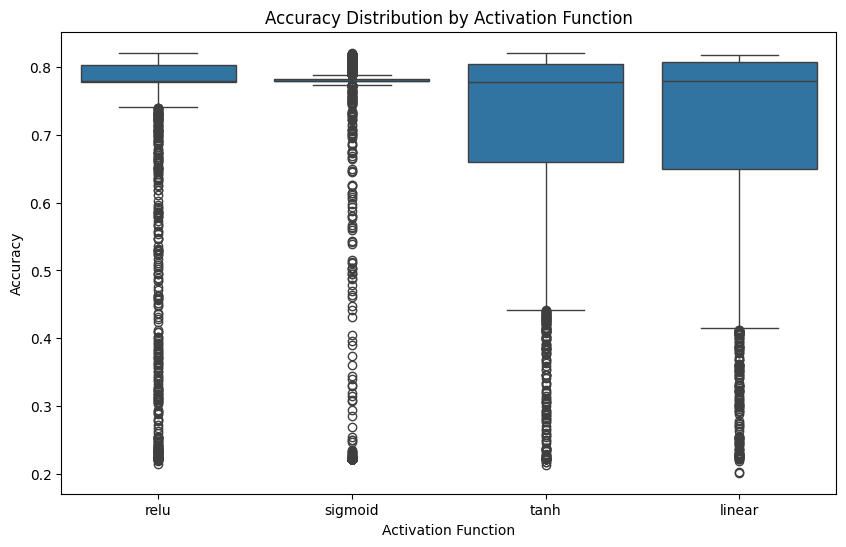

In [24]:
# Boxplot: Accuracy by Activation Function
plt.figure(figsize=(10, 6))
sns.boxplot(x='activation', y='accuracy', data=results_df)
plt.title('Accuracy Distribution by Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.show()

In [25]:
# 4. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4673
           1       0.67      0.19      0.29      1327

    accuracy                           0.80      6000
   macro avg       0.74      0.58      0.59      6000
weighted avg       0.78      0.80      0.75      6000



## Analisis